**Toronto Airbnb Dataset**

Questions?

**1) What are the most desired anementies that customers prefer when booking an Airbnbs?**

2) Does the number of bedrooms increase the pricing of the  

3) Which type of room is most preferred ? - entire house, private, etc

4) Price - correlation with number of bedrooms, or bathrooms, etc   

5) Number of bathrooms - number

6) Property type - apartment, house,etc - increase cost?

7) Reviews -  score rating - correlation with number of beds, increased satisfaction with the popular anementies - ?

Does having the best anementies increase rating?

Bedrooms and bathrooms - price increase?

**3 MAIN ! Can we predict the price of the based on the features that are provided?**

How well can we predict the cost of an Airbnb based on the features provided?

Does the neighborhood of the Airbnb location have an influence on the cost price?
example asnwer, 
we can see from the data ,yes, in fact, x percent of people in downtown costs more than the ones in x

ratings = 




2. **Which neighborhoods have the highest rating review scores?**
3. Which neighborhoods have the highest listing prices?
4. What attributes in the listing data most associate or contribute to prices?

1. What are the most common anementies that are listed in Airbnbs in Toronto?
2. Which neighborhoods have the highest reviews score and highest listing price?
3. Can we predict the cost of an Airbnb based on the features provided?
4.


**Installing and Importing Python Libraries**

In [303]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import Counter


import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

#awesome interactive map library
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster


In [304]:
df_list = pd.read_csv('listings_sep_09_2020.csv')

In [305]:
df_list.shape

(19343, 74)

**Data Sources, Pre-processing and Data Cleaning**

In [306]:
df_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

We see a lot of columns in the dataset and most of them do not contribute to our objective. Therefore, they can be dropped straight up. So let's just keep the columns that are of interest. 

In [307]:
# Cleaning data - Drops columns that are likely irrelevant to this analysis
df_list.drop(['listing_url', 'last_scraped', 'scrape_id','picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'description', 'neighborhood_overview', 'host_about', 'host_acceptance_rate', 'license', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'bathrooms_text', 'minimum_nights', 'host_identity_verified', 'neighbourhood_group_cleansed', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'bathrooms','instant_bookable', 'calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'neighbourhood', 'first_review','last_review','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','has_availability', 'availability_60','availability_90','availability_365','calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review', 'calendar_updated','review_scores_accuracy','reviews_per_month'], axis=1, inplace=True)


In [308]:
df_list.head()

,id,name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,availability_30,number_of_reviews,review_scores_rating
0,1419,Beautiful home in amazing area!,Little Portugal,43.64617,-79.42451,Entire house,Entire home/apt,10,5.0,7.0,"[""Shampoo"", ""TV"", ""Dryer"", ""Indoor fireplace"",...",$469.00,0,7,100.0
1,8077,Downtown Harbourfront Private Room,Waterfront Communities-The Island,43.64105,-79.37628,Private room in apartment,Private room,2,1.0,1.0,"[""Shampoo"", ""TV"", ""Pool"", ""Gym"", ""Free parking...",$99.00,30,169,97.0
2,12604,Seaton Village Parlour Bedroom,Annex,43.66724,-79.41598,Private room in house,Private room,1,1.0,1.0,"[""Indoor fireplace"", ""Wifi""]",$66.00,0,0,NaN
3,23691,Queen Bedroom close to downtown,Briar Hill-Belgravia,43.69602,-79.45468,Private room in house,Private room,3,1.0,1.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$70.00,0,217,95.0
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,Waterfront Communities-The Island,43.64530,-79.38940,Entire condominium,Entire home/apt,5,1.0,2.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$135.00,23,40,95.0


In [309]:
df_list.dtypes

id                          int64
name                       object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bedrooms                  float64
beds                      float64
amenities                  object
price                      object
availability_30             int64
number_of_reviews           int64
review_scores_rating      float64
dtype: object

In [310]:
# displays the data types and the number of these data types in the dataset
df_list.dtypes.value_counts()

object     6
float64    5
int64      4
dtype: int64

In [311]:
print('Number of quantitative features: {}'.format(len([d for d in df_list.columns if df_list.dtypes[d] != 'object'])))
print('Number of qualitative features: {}'.format(len([d for d in df_list.columns if df_list.dtypes[d] == 'object'])))

Number of quantitative features: 9
Number of qualitative features: 6


In [312]:
df_list.shape

(19343, 15)

In [313]:
# drops rows in column 'price' has missing values
df_list = df_list.dropna(subset=['price'], axis=0)

In [314]:
# displays columns with missing values
df_list.isnull().sum().sort_values(ascending=False)

review_scores_rating      4333
bedrooms                  1429
beds                       196
name                         1
number_of_reviews            0
availability_30              0
price                        0
amenities                    0
accommodates                 0
room_type                    0
property_type                0
longitude                    0
latitude                     0
neighbourhood_cleansed       0
id                           0
dtype: int64

**Examining Neighborhood Frequency**

In [315]:
# analyze the top 20 frequency of each listing based on neighborhood
top_niegh = df_list['neighbourhood_cleansed'].value_counts().head(20)
top_niegh

Waterfront Communities-The Island      3291
Niagara                                 836
Annex                                   630
Church-Yonge Corridor                   628
Bay Street Corridor                     584
Kensington-Chinatown                    529
Dovercourt-Wallace Emerson-Junction     509
Moss Park                               484
Trinity-Bellwoods                       478
Willowdale East                         473
Little Portugal                         412
South Riverdale                         374
Palmerston-Little Italy                 352
South Parkdale                          314
Mount Pleasant West                     253
Mimico (includes Humber Bay Shores)     242
Cabbagetown-South St.James Town         233
Roncesvalles                            225
North St.James Town                     203
Newtonbrook West                        195
Name: neighbourhood_cleansed, dtype: int64

**Which Neighbourhood has the most Airbnb listings?**

[Text(0, 0, 'Waterfront Communities-The Island'),
 Text(1, 0, 'Niagara'),
 Text(2, 0, 'Annex'),
 Text(3, 0, 'Church-Yonge Corridor'),
 Text(4, 0, 'Bay Street Corridor'),
 Text(5, 0, 'Kensington-Chinatown'),
 Text(6, 0, 'Dovercourt-Wallace Emerson-Junction'),
 Text(7, 0, 'Moss Park'),
 Text(8, 0, 'Trinity-Bellwoods'),
 Text(9, 0, 'Willowdale East'),
 Text(10, 0, 'Little Portugal'),
 Text(11, 0, 'South Riverdale'),
 Text(12, 0, 'Palmerston-Little Italy'),
 Text(13, 0, 'South Parkdale'),
 Text(14, 0, 'Mount Pleasant West'),
 Text(15, 0, 'Mimico (includes Humber Bay Shores)'),
 Text(16, 0, 'Cabbagetown-South St.James Town'),
 Text(17, 0, 'Roncesvalles'),
 Text(18, 0, 'North St.James Town'),
 Text(19, 0, 'Newtonbrook West')]

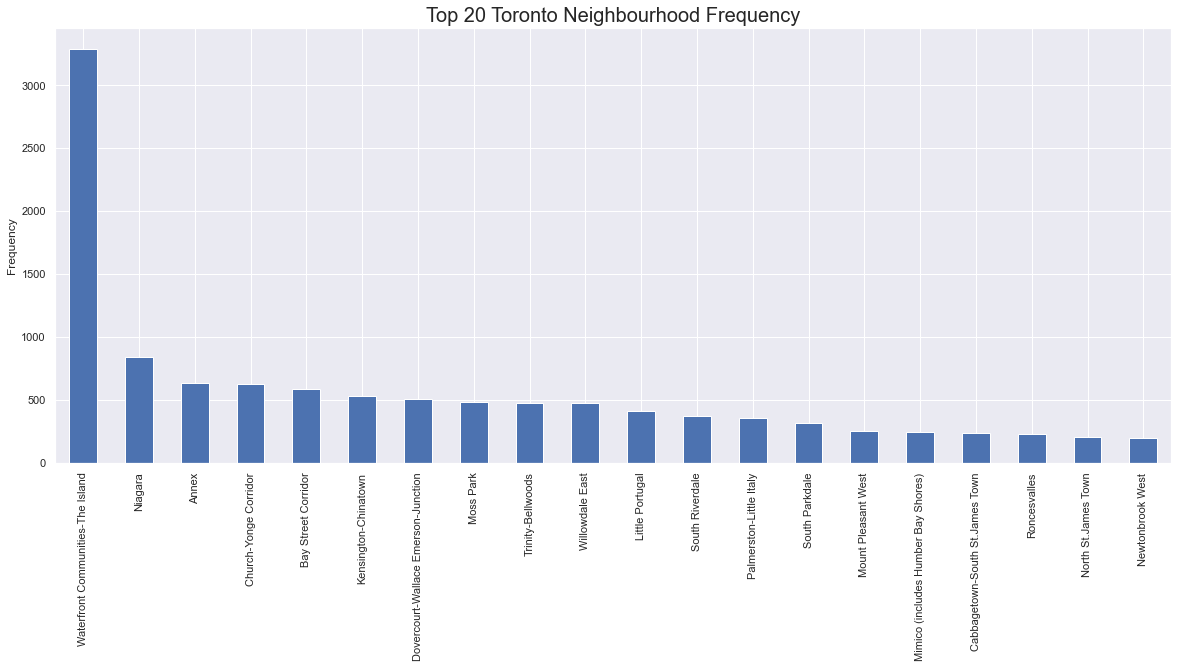

In [316]:
sns.set(rc={'figure.figsize':(20,8)})
viz_bar = top_niegh.plot(kind='bar')
viz_bar.set_title('Top 20 Toronto Neighbourhood Frequency', size=20)
viz_bar.set_ylabel('Frequency')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=90)

It looks like Waterfront Communities-The Island has the most listings, followed by Niagara, and then Annex. We will now analyze which neighborhoods have the highest rating review score and highest listing price.

**Which neighborhoods have the highest rating review scores?**

Text(0, 0.5, 'Rating')

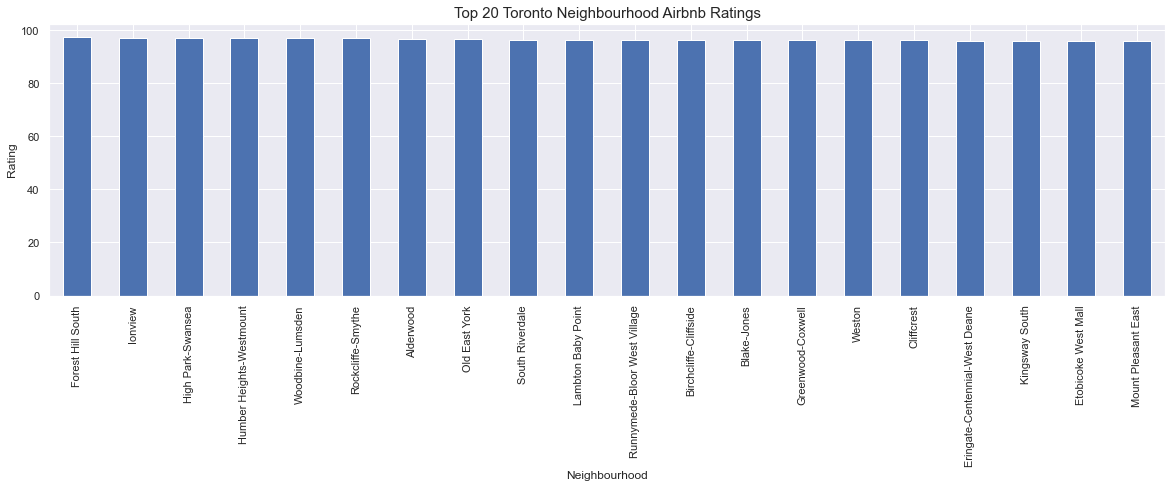

In [317]:
# Groups a dataframe by "neighbourhood_group_cleansed" and displays a chart with the means of "review_scores_rating"
neigh_rating = df_list.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)
neigh_rating[:20].plot.bar(figsize=(20,5))
plt.title('Top 20 Toronto Neighbourhood Airbnb Ratings', size=15)
plt.xlabel('Neighbourhood')
plt.ylabel('Rating')



It looks like Forest Hill South, Ionview, and High Park-Swansea have the highest review score ratings. However, there isn't much variance/difference in the review score ratings.

**Which neighbourhoods have the highest listing prices?**

In [318]:
# remove $ from price
df_list['price'] = df_list['price'].replace({'\$':''}, regex = True)
df_list['price'] = df_list['price'].replace({'\,':''}, regex = True)
# change price from object to float type
df_list['price'] = df_list['price'].astype(float)

Text(0, 0.5, 'Price($)')

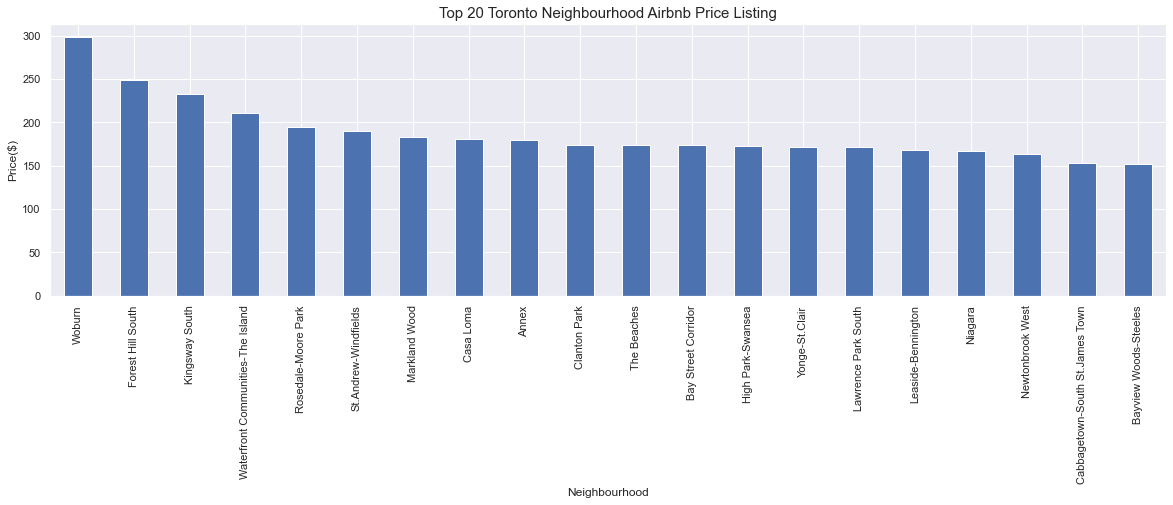

In [319]:
# # Groups a dataframe by "neighbourhood_group_cleansed" and displays a chart with the means of "price_listing"
neigh_price = df_list.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
neigh_price[:20].plot.bar(figsize=(20,5))
plt.title('Top 20 Toronto Neighbourhood Airbnb Price Listing', size=15)
plt.xlabel('Neighbourhood')
plt.ylabel('Price($)')

Woburn, Forest Hill South, and Kingsway South have the highest listing prices.

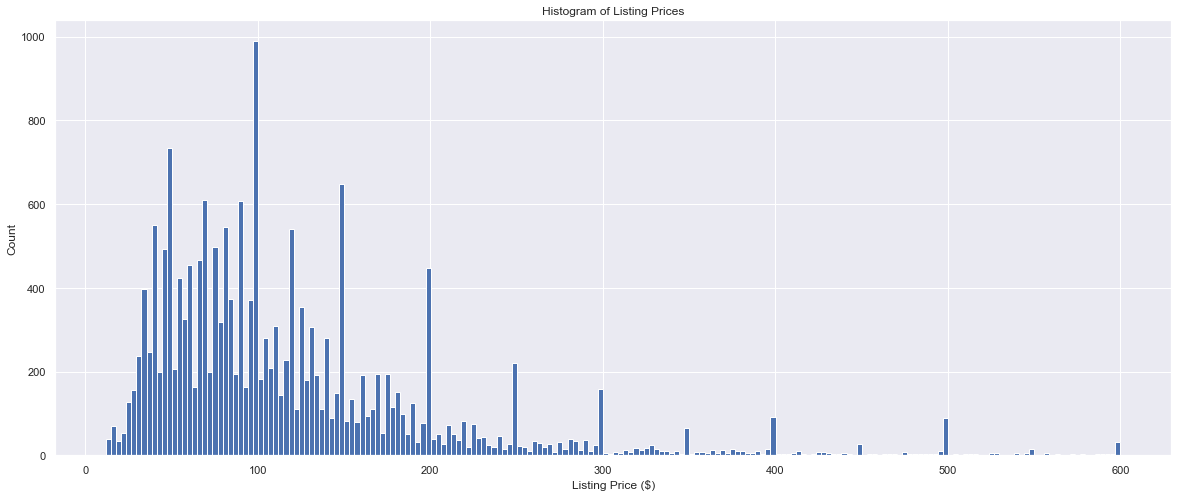

In [320]:
# removed listings of prices that were greater than $600, I judged them as outliers
df_list.loc[(df_list.price <= 600) & (df_list.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing Price ($)')
plt.title('Histogram of Listing Prices');

**What are the most common amenities in Toronto Airbnbs?**

In [321]:
df_list.amenities = df_list.amenities.str.replace("[{}]", "").str.replace('"', "")
df_list['amenities'].head()

0    [Shampoo, TV, Dryer, Indoor fireplace, Fire ex...
1    [Shampoo, TV, Pool, Gym, Free parking on premi...
2                             [Indoor fireplace, Wifi]
3    [Carbon monoxide alarm, Private entrance, Kitc...
4    [Carbon monoxide alarm, Private entrance, Kitc...
Name: amenities, dtype: object

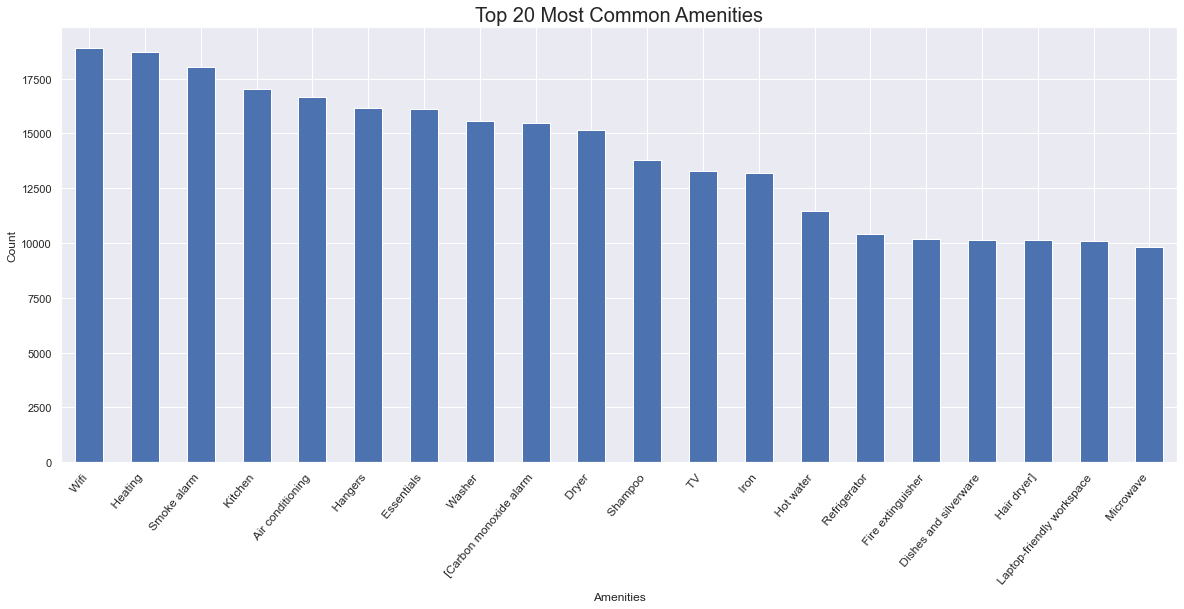

In [322]:
pd.Series(np.concatenate(df_list['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right', fontsize=12)
plt.xlabel('Amenities')
plt.ylabel('Count')
plt.title('Top 20 Most Common Amenities', size=20)
plt.show();

In the above chart you can see that the most common amenities in Toronto listings are:

Internet
Heating
Smoke Alarm
Kitchen
Air Conditioning

**Toronto Airbnb Map Visualizations**

In [323]:
Tor_map = folium.Map([43.64617,-79.42451],zoom_start=11)
HeatMap(df_list[['latitude','longitude']],radius=10).add_to(Tor_map)
display(Tor_map)

In [324]:
cluster_map = folium.Map([43.64617,-79.42451],zoom_start=11)
FastMarkerCluster(df_list[['latitude','longitude']],radius=10).add_to(cluster_map)
cluster_map

In [325]:
prop_room = df_list[['property_type', 'room_type', 'price']]

# first ten of the table
prop_room[0:10]

,property_type,room_type,price
0,Entire house,Entire home/apt,469.0
1,Private room in apartment,Private room,99.0
2,Private room in house,Private room,66.0
3,Private room in house,Private room,70.0
4,Entire condominium,Entire home/apt,135.0
5,Entire apartment,Entire home/apt,54.0
6,Entire apartment,Entire home/apt,53.0
7,Entire apartment,Entire home/apt,132.0
8,Entire house,Entire home/apt,100.0
9,Entire apartment,Entire home/apt,75.0


In [326]:
# Grouping by porperty and room type, and then aggregating them
# using mean of the price
prop_room_group = prop_room.groupby(['property_type', 'room_type']).mean()

# resetting the index in order to turn the lists into a readable table
p = prop_room_group.reset_index()

# pivoting the table based on the 3 factors, in order.
p = p.pivot('property_type', 'room_type', 'price')

# replacing the NaN values with 0
p.fillna(0.00, inplace=True)

p

room_type,Entire home/apt,Hotel room,Private room,Shared room
property_type,,,,
Barn,199.000000,0.0,0.0,0.000000
Boat,334.750000,0.0,0.0,0.000000
Camper/RV,237.000000,0.0,0.0,0.000000
Earth house,40.000000,0.0,0.0,0.000000
Entire apartment,140.670836,0.0,0.0,0.000000
...,...,...,...,...
Shared room in tiny house,0.000000,0.0,0.0,20.333333
Shared room in townhouse,0.000000,0.0,0.0,32.275862
Shared room in villa,0.000000,0.0,0.0,69.333333


**PREDICTION ANALYSIS**

In [327]:
df_list2 = df_list[['price',
           'room_type',
           'accommodates',
           'bedrooms',
           'beds',
           'review_scores_rating',
           'room_type',
           'amenities']]
df_list2.head()

,price,room_type,accommodates,bedrooms,beds,review_scores_rating,room_type,amenities
0,469.0,Entire home/apt,10,5.0,7.0,100.0,Entire home/apt,"[Shampoo, TV, Dryer, Indoor fireplace, Fire ex..."
1,99.0,Private room,2,1.0,1.0,97.0,Private room,"[Shampoo, TV, Pool, Gym, Free parking on premi..."
2,66.0,Private room,1,1.0,1.0,NaN,Private room,"[Indoor fireplace, Wifi]"
3,70.0,Private room,3,1.0,1.0,95.0,Private room,"[Carbon monoxide alarm, Private entrance, Kitc..."
4,135.0,Entire home/apt,5,1.0,2.0,95.0,Entire home/apt,"[Carbon monoxide alarm, Private entrance, Kitc..."


In [328]:
room_type = pd.get_dummies(df_list2.room_type).astype(int)

In [329]:
# we drop the original columns and replace them with indicator columns
df_list2 = df_list2.drop(['room_type'], axis = 1)

In [330]:
df_list2['review_scores_rating'].fillna((df_list2['review_scores_rating'].mean()), inplace=True)
df_list2['bedrooms'].fillna((df_list2['bedrooms'].mode()[0]), inplace=True)
df_list2['beds'].fillna((df_list2['beds'].mode()[0]), inplace=True)

In [331]:
# splitting the amenities list to draw out how many amenities each listing has

amenities_list = []

for element in df_list2.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

df_list2.amenities = amenities_list

In [332]:
df_list2

,price,accommodates,bedrooms,beds,review_scores_rating,amenities
0,469.0,10,5.0,7.0,100.00000,19
1,99.0,2,1.0,1.0,97.00000,17
2,66.0,1,1.0,1.0,94.30493,3
3,70.0,3,1.0,1.0,95.00000,60
4,135.0,5,1.0,2.0,95.00000,69
...,...,...,...,...,...,...
19338,99.0,2,1.0,1.0,94.30493,53
19339,37.0,1,1.0,1.0,94.30493,18
19340,29.0,1,1.0,1.0,94.30493,12
19341,111.0,2,1.0,2.0,94.30493,18


In [333]:
#Split into explanatory and response variables
X = df_list2[['accommodates', 'bedrooms', 'beds', 'review_scores_rating','amenities']]
y = df_list2['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.07096852398577091 on 5803 values.'

**Most common Amenities in Toronto Airbnbs**

In [334]:
#I first create an empty list to fill with amenities available.
list_of_amenities = []

#I create a for loop to append all amenities values from the dataset into the list.
for i in range(len(df_list)):
    list_of_amenities.append(df_list['amenities'][i])

    
#In the dataset, every listing has a list of amenities, so in order to take unique amenities from the whole dataset
#I use the below code. I use the "set" function to make the amenities unique and than convert the set into a list
#to remain consistency of data type.
list_of_amenities = list((s.strip('\'\{\}') for s in list_of_amenities))
list_of_amenities_string = ",".join(list_of_amenities)
list_of_amenities = list(set(list_of_amenities_string.split(",")))

#After execution the above lines in this cell, we have an empty string in the list of amenties.
#We have to remove that one from the list.
without_empty_list_of_amenities = []
for string in list_of_amenities:
    if (string != ""):
        without_empty_list_of_amenities.append(string)
list_of_amenities = without_empty_list_of_amenities

In [335]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of amenities
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the amenity is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [336]:
#I create a dataframe named study, which has lists of amenities as one column and the count of these amenities lists
#in our main (df_lis)
study = df_list['amenities'].value_counts().reset_index()
study.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)

In [664]:
#Here with the total_count function, I count the number of listings that contains each amenity in the amenities list.
study_df = total_count(study, 'amenities', 'count', list_of_amenities)
study_df.set_index('amenities', inplace=True)

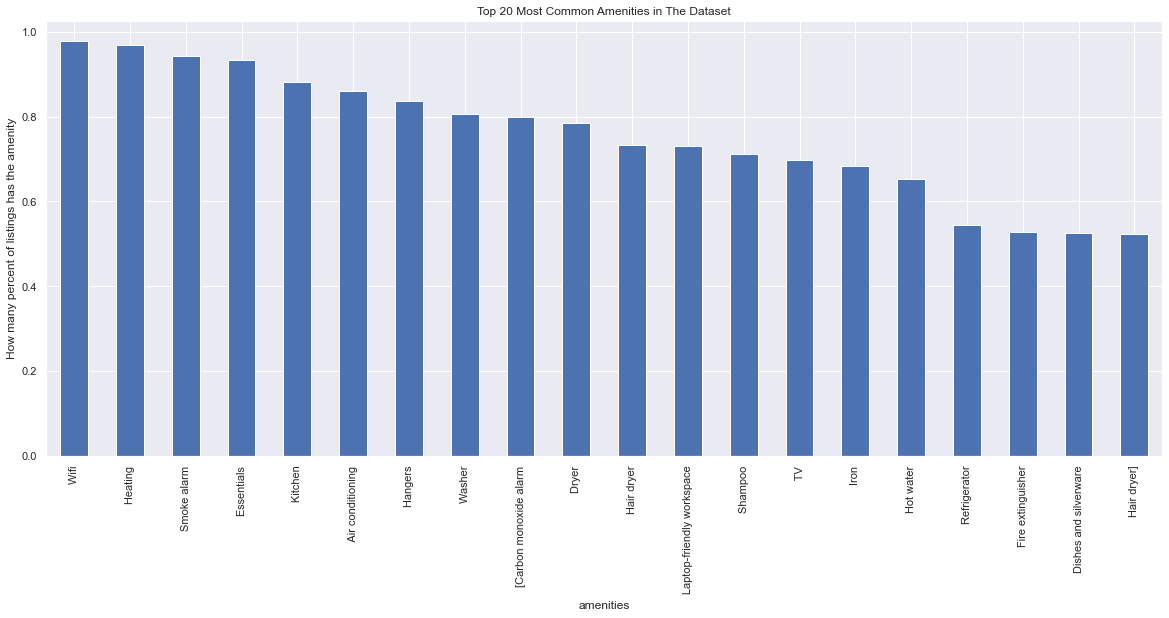

In [665]:
#Here I create a bar chart to show the percentage of each amenity from the most common to the least common.
(study_df/len(df_list))[:20].plot(kind='bar', legend=None);
plt.title('Top 20 Most Common Amenities in The Dataset');
plt.ylabel('How many percent of listings has the amenity')
plt.show()

In [ ]:
def clean_data(df_list):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df_list = df_list.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df_list = df_list.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df_list.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df_list[col].fillna((df_list[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df_list.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df_list = pd.concat([df.drop(var, axis=1), pd.get_dummies(df_list[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df_list
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df_list)

In [ ]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

In [ ]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r

In [ ]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

In [ ]:
# @title Features with most weight by Linear Regression

# prep data, normalise, one-hot
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

pd_model_data_x = listings[['neighbourhood_group_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms']]
pd_model_data_x['accommodates'] = min_max_scaler.fit_transform(pd_model_data_x[['accommodates']])
pd_model_data_x['bathrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bathrooms']])
pd_model_data_x['bedrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bedrooms']])

pd_model_data_x = pd.get_dummies(pd_model_data_x, columns=['neighbourhood_group_cleansed','property_type','room_type'])
pd_model_data_y = listings['price']

# train and test - x and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd_model_data_x,pd_model_data_y,test_size=0.2, random_state=42)

# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm.coef_})
_ = coefficients.sort_values('importance', ascending=False)[:15].plot(x='feature', y='importance', kind='bar')